In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('data/adult.csv')

In [3]:
print("First 10 Rows of the the dataset: ", df.head(10))

First 10 Rows of the the dataset:     age    workclass  fnlwgt     education  education.num marital.status  \
0   90            ?   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66            ?  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad              9       Divorced   
9   41      Private   70037  Some-college             10  Never-married   

          occupation    relationship   race     sex  capital.gain  \
0                  ?   Not-in-family  White  Female             0   
1

In [4]:
print("Shape of the the dataset: ",df.shape)

Shape of the the dataset:  (32561, 15)


In [5]:
print("Data Types of Columns: \n", df.dtypes)

Data Types of Columns: 
 age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


In [6]:
print("Info: \n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Info: 
 None


In [7]:
print("Basic Statistics for numerical columns: \n",df.describe())

Basic Statistics for numerical columns: 
                 age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [8]:
print("Basic Statistics for categorical columns: \n",df.describe(include='object'))

Basic Statistics for categorical columns: 
        workclass education      marital.status      occupation relationship  \
count      32561     32561               32561           32561        32561   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native.country income  
count   32561  32561          32561  32561  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    27816  21790          29170  24720  


### Checking for duplicates

In [9]:
# checking for duplicates
duplicates = df[df.duplicated()]
print(duplicates.shape)

(24, 15)


In [10]:
# dropping duplicates by keeping the first occurance
df.drop_duplicates(keep='first', inplace=True)
df.shape

(32537, 15)

### Observing unique values for columns

In [11]:
def unique_value_analysis(df):
    columns = df.columns
    for column in columns:
        print("Column Name: ", column)
        print(f'Number of Unique values in {column}: ', len(df[column].unique()))
        print(f'Unique values in {column}: ', df[column].unique())
        print("\n")
unique_value_analysis(df)

Column Name:  age
Number of Unique values in age:  73
Unique values in age:  [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]


Column Name:  workclass
Number of Unique values in workclass:  9
Unique values in workclass:  ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


Column Name:  fnlwgt
Number of Unique values in fnlwgt:  21648
Unique values in fnlwgt:  [ 77053 132870 186061 ...  34066  84661 257302]


Column Name:  education
Number of Unique values in education:  16
Unique values in education:  ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


Column Name:  education.num
Number of Unique values in education.num:  16
Un

### Observing Missing Values

In [12]:
def missing_value_analysis(df):
    columns = df.columns
    for column in columns:
        print("Column Name: ", column)
        print(f'Number of Missing values in {column}: ', df[column].isnull().sum())
        print("\n")
missing_value_analysis(df)

Column Name:  age
Number of Missing values in age:  0


Column Name:  workclass
Number of Missing values in workclass:  0


Column Name:  fnlwgt
Number of Missing values in fnlwgt:  0


Column Name:  education
Number of Missing values in education:  0


Column Name:  education.num
Number of Missing values in education.num:  0


Column Name:  marital.status
Number of Missing values in marital.status:  0


Column Name:  occupation
Number of Missing values in occupation:  0


Column Name:  relationship
Number of Missing values in relationship:  0


Column Name:  race
Number of Missing values in race:  0


Column Name:  sex
Number of Missing values in sex:  0


Column Name:  capital.gain
Number of Missing values in capital.gain:  0


Column Name:  capital.loss
Number of Missing values in capital.loss:  0


Column Name:  hours.per.week
Number of Missing values in hours.per.week:  0


Column Name:  native.country
Number of Missing values in native.country:  0


Column Name:  income
Number of

### Although there are no missing values in any column, we can see in unique value list some values are '?'. They are essentially euvalent to Nan Values

In [13]:
df[df == '?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [14]:
#Replacing '?' with NaN values
df[df == '?'] = np.nan

In [15]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [16]:
missing_value_analysis(df)

Column Name:  age
Number of Missing values in age:  0


Column Name:  workclass
Number of Missing values in workclass:  1836


Column Name:  fnlwgt
Number of Missing values in fnlwgt:  0


Column Name:  education
Number of Missing values in education:  0


Column Name:  education.num
Number of Missing values in education.num:  0


Column Name:  marital.status
Number of Missing values in marital.status:  0


Column Name:  occupation
Number of Missing values in occupation:  1843


Column Name:  relationship
Number of Missing values in relationship:  0


Column Name:  race
Number of Missing values in race:  0


Column Name:  sex
Number of Missing values in sex:  0


Column Name:  capital.gain
Number of Missing values in capital.gain:  0


Column Name:  capital.loss
Number of Missing values in capital.loss:  0


Column Name:  hours.per.week
Number of Missing values in hours.per.week:  0


Column Name:  native.country
Number of Missing values in native.country:  582


Column Name:  income
N

### Handling missing Values

Column: workclass

In [17]:
df['workclass'].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

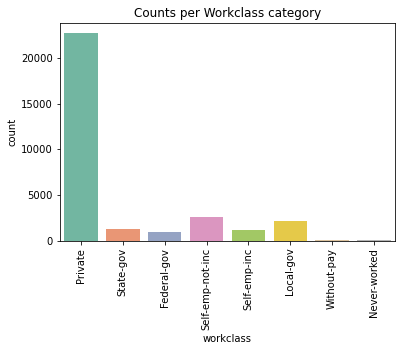

In [18]:
#Replacing the NaN values with the most freuently appearing value
sns.countplot(x='workclass', data=df, palette='Set2')
plt.title('Counts per Workclass category')
plt.xticks(rotation=90)
plt.show()


workclass_mode = df.describe(include='all')['workclass']['top']

df['workclass'] = df['workclass'].fillna(workclass_mode)

Column: occupation

In [19]:
df['occupation'].unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

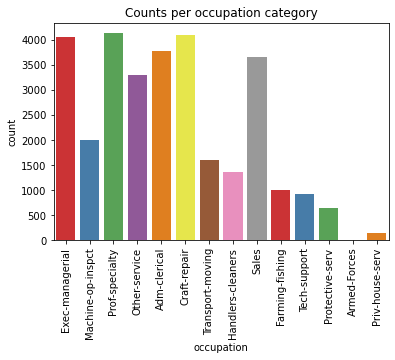

In [20]:
#Replacing the NaN values with the most freuently appearing value
sns.countplot(x='occupation', data=df, palette='Set1')
plt.title('Counts per occupation category')
plt.xticks(rotation=90)
plt.show()


occupation_mode = df.describe(include='all')['occupation']['top']

df['occupation'] = df['occupation'].fillna(occupation_mode)

Column: native.country

In [21]:
df['native.country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

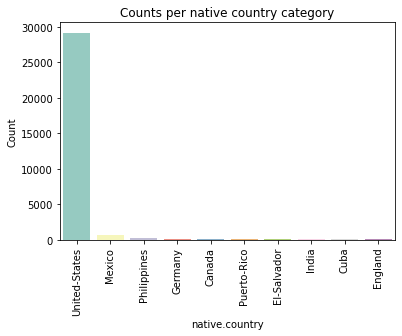

United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [22]:
#Replacing the NaN values with the most freuently appearing value
top_10_counts = df['native.country'].value_counts().head(10)

# Create a new DataFrame with only the top 10 categories and their counts
df_top_10 = top_10_counts.reset_index()
df_top_10.columns = ['native.country', 'Count']

# Create a Seaborn bar plot with categories sorted in descending order
sns.barplot(x='native.country', y='Count', data=df_top_10, palette='Set3')

# sns.countplot(x='native.country', data=df, palette='Set1')
plt.title('Counts per native country category')
plt.xticks(rotation=90)
plt.show()

print(df['native.country'].value_counts())


native_country_mode = df.describe(include='all')['native.country']['top']

df['native.country'] = df['native.country'].fillna(native_country_mode)

### All missing values are handled

In [23]:
missing_value_analysis(df)

Column Name:  age
Number of Missing values in age:  0


Column Name:  workclass
Number of Missing values in workclass:  0


Column Name:  fnlwgt
Number of Missing values in fnlwgt:  0


Column Name:  education
Number of Missing values in education:  0


Column Name:  education.num
Number of Missing values in education.num:  0


Column Name:  marital.status
Number of Missing values in marital.status:  0


Column Name:  occupation
Number of Missing values in occupation:  0


Column Name:  relationship
Number of Missing values in relationship:  0


Column Name:  race
Number of Missing values in race:  0


Column Name:  sex
Number of Missing values in sex:  0


Column Name:  capital.gain
Number of Missing values in capital.gain:  0


Column Name:  capital.loss
Number of Missing values in capital.loss:  0


Column Name:  hours.per.week
Number of Missing values in hours.per.week:  0


Column Name:  native.country
Number of Missing values in native.country:  0


Column Name:  income
Number of

In [24]:
def analyze_categorical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
    plt.show()

def analyze_stats_categorical(df, col):
    print(f"{col} Summary:")
    print(df[col].value_counts())
    print("Unique values:", df[col].nunique())
    print("\n")

def analyze_piechart_categorical(df, col):
    df[col].value_counts().plot.pie(autopct= '%1.1f%%')
    print("\n")

Initial overview of the capital data

In [25]:
df['capital_diff'] = df['capital.gain'] - df['capital.loss']
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
# df.drop(['capital.gain'], axis = 1, inplace = True)
# df.drop(['capital.loss'], axis = 1, inplace = True)

In [26]:
px.histogram(df, x='capital_diff', color="income", barmode='group', title='Income Distribution by Capital Diff')

## Selecting income column as our Target

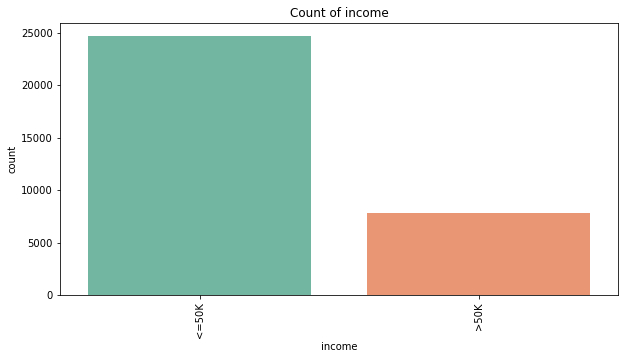

income Summary:
<=50K    24698
>50K      7839
Name: income, dtype: int64
Unique values: 2






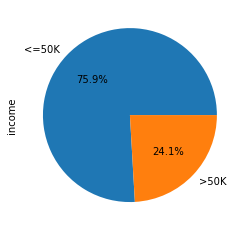

In [27]:
analyze_categorical_distribution(df,'income')
analyze_stats_categorical(df,'income')
analyze_piechart_categorical(df,'income')

It can be seen people earning less than equal to 50K is huge as compared to people earning more than 50K

In [28]:
#Ordinal Encoding income values to numerical (binary)
df['income_encoded'] = df['income'].map({'<=50K': 0, '>50K': 1})
print(df[['income', 'income_encoded']])

      income  income_encoded
0      <=50K               0
1      <=50K               0
2      <=50K               0
3      <=50K               0
4      <=50K               0
...      ...             ...
32556  <=50K               0
32557  <=50K               0
32558   >50K               1
32559  <=50K               0
32560  <=50K               0

[32537 rows x 2 columns]


In [29]:
# Get all categorical column names
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Get all numerical column names
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income', 'capital_diff']
Numerical Columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income_encoded']


## Categorical Columns

1. Workclass

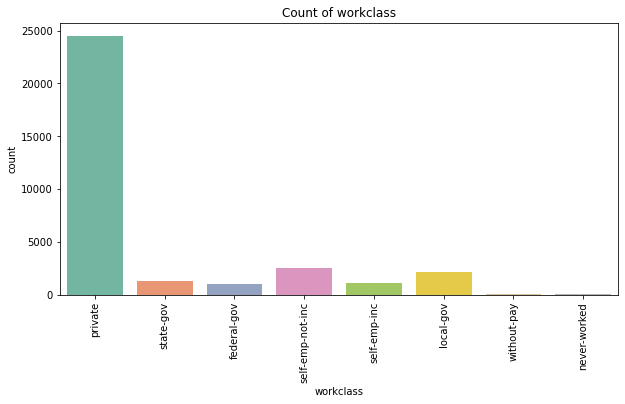

workclass Summary:
private             24509
self-emp-not-inc     2540
local-gov            2093
state-gov            1298
self-emp-inc         1116
federal-gov           960
without-pay            14
never-worked            7
Name: workclass, dtype: int64
Unique values: 8




In [30]:
#Make casing consistent (lower-case)
df['workclass'] = df['workclass'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'workclass')
analyze_stats_categorical(df,'workclass')

- Private workclass dominates the count with around 24000.

<Figure size 576x360 with 0 Axes>

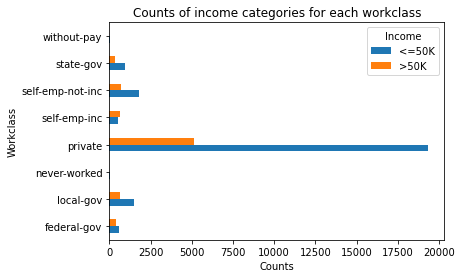

In [31]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['workclass', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each workclass')
plt.ylabel('Workclass')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

- within private workclass, the people with <=50K income dominate people with >50K income

2. education

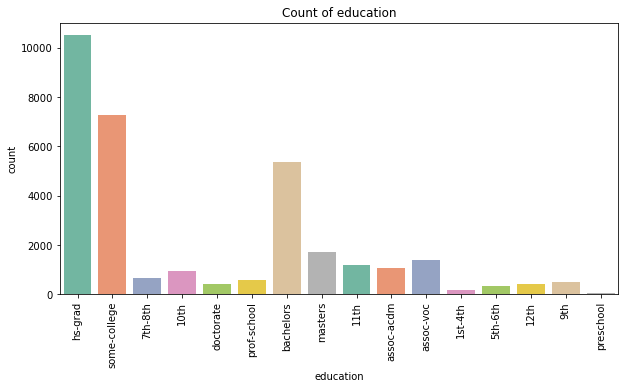

education Summary:
hs-grad         10494
some-college     7282
bachelors        5353
masters          1722
assoc-voc        1382
11th             1175
assoc-acdm       1067
10th              933
7th-8th           645
prof-school       576
9th               514
12th              433
doctorate         413
5th-6th           332
1st-4th           166
preschool          50
Name: education, dtype: int64
Unique values: 16




In [32]:
#Make casing consistent (lower-case)
df['education'] = df['education'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'education')
analyze_stats_categorical(df,'education')

- hs-grad has highest no of adults.
- preschool have lowest.

In [33]:
conditions = [
    df['education'].isin(['1st-4th', '5th-6th']),
    df['education'].isin(['7th-8th', '9th', '10th', '11th', '12th']),
    df['education'] == 'hs-grad',
    df['education'].isin(['some-college', 'assoc-voc', 'assoc-acdm']),
    df['education'] == 'bachelors',
    df['education'].isin(['prof-school', 'doctorate'])
]

labels = [
    'primary',
    'middle-School',
    'hs-grad',
    'Others',
    'bachelors',
    'phd'
]

df['education_group'] = np.select(conditions, labels, default='Others')
print(df[['education', 'education_group']].head(50))

       education education_group
0        hs-grad         hs-grad
1        hs-grad         hs-grad
2   some-college          Others
3        7th-8th   middle-School
4   some-college          Others
5        hs-grad         hs-grad
6           10th   middle-School
7      doctorate             phd
8        hs-grad         hs-grad
9   some-college          Others
10     doctorate             phd
11   prof-school             phd
12     bachelors       bachelors
13       masters          Others
14     doctorate             phd
15   prof-school             phd
16          11th   middle-School
17       masters          Others
18    assoc-acdm          Others
19     bachelors       bachelors
20     bachelors       bachelors
21          11th   middle-School
22       hs-grad         hs-grad
23  some-college          Others
24       hs-grad         hs-grad
25     assoc-voc          Others
26       1st-4th         primary
27       5th-6th         primary
28          10th   middle-School
29        

<Figure size 576x360 with 0 Axes>

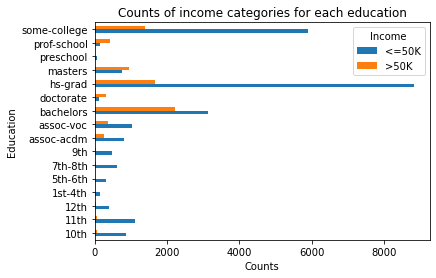

In [34]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['education', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each education')
plt.ylabel('Education')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

3. marital.status

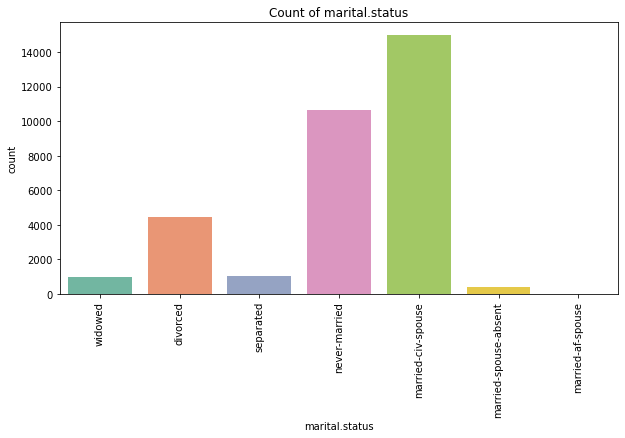

marital.status Summary:
married-civ-spouse       14970
never-married            10667
divorced                  4441
separated                 1025
widowed                    993
married-spouse-absent      418
married-af-spouse           23
Name: marital.status, dtype: int64
Unique values: 7




In [35]:
#Make casing consistent (lower-case)
df['marital.status'] = df['marital.status'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'marital.status')
analyze_stats_categorical(df,'marital.status')

- married-civ-spouse has maximum count.
- married-af-spouse has minimum count.

<Figure size 576x360 with 0 Axes>

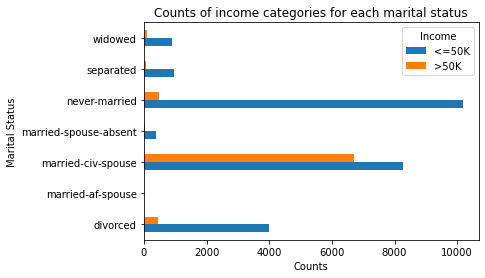

In [36]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['marital.status', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each marital status')
plt.ylabel('Marital Status')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

4. occupation

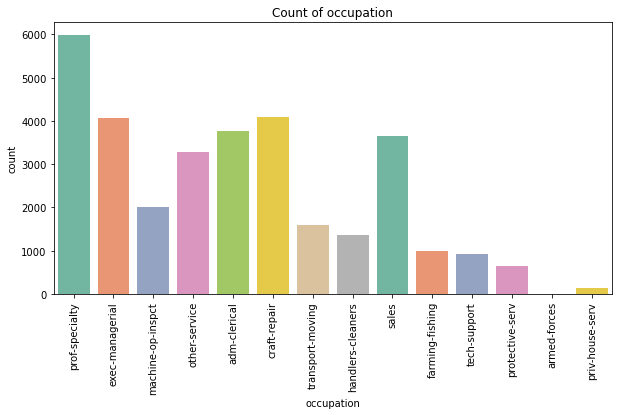

occupation Summary:
prof-specialty       5979
craft-repair         4094
exec-managerial      4065
adm-clerical         3768
sales                3650
other-service        3291
machine-op-inspct    2000
transport-moving     1597
handlers-cleaners    1369
farming-fishing       992
tech-support          927
protective-serv       649
priv-house-serv       147
armed-forces            9
Name: occupation, dtype: int64
Unique values: 14




In [37]:
#Make casing consistent (lower-case)
df['occupation'] = df['occupation'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'occupation')
analyze_stats_categorical(df,'occupation')

- craft-repair has the maximum count.
- armed-forces has minimum scount.

<Figure size 576x360 with 0 Axes>

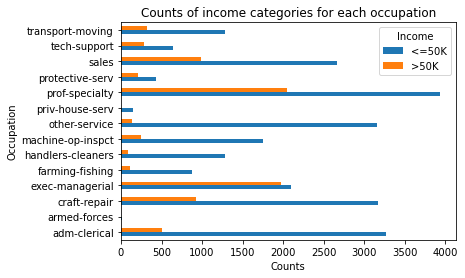

In [38]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['occupation', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each occupation')
plt.ylabel('Occupation')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

5. relationship

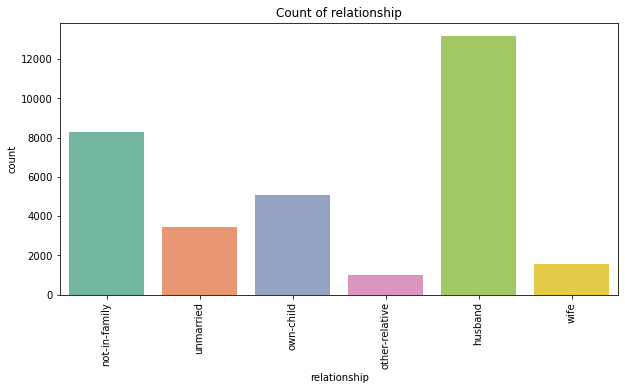

relationship Summary:
husband           13187
not-in-family      8292
own-child          5064
unmarried          3445
wife               1568
other-relative      981
Name: relationship, dtype: int64
Unique values: 6




In [39]:
#Make casing consistent (lower-case)
df['relationship'] = df['relationship'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'relationship')
analyze_stats_categorical(df,'relationship')

- Husband has the maximum count. Indicating majority of Males.
- Wife has the lowest count

<Figure size 576x360 with 0 Axes>

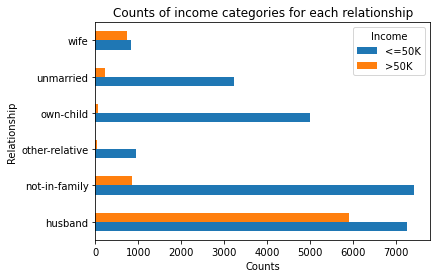

In [40]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['relationship', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each relationship')
plt.ylabel('Relationship')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

- A person with relation as husband in a family has greater probability of having >50K income

6. race

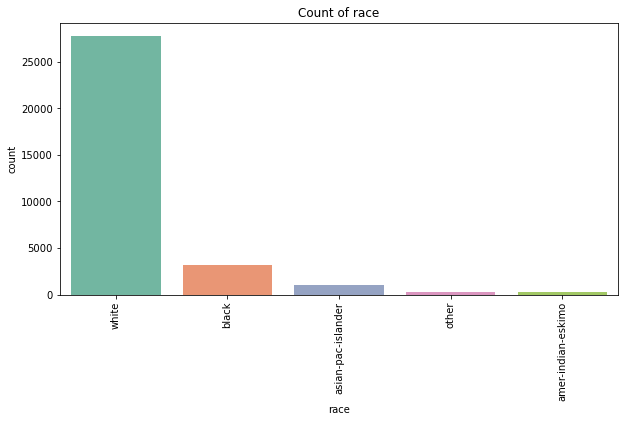

race Summary:
white                 27795
black                  3122
asian-pac-islander     1038
amer-indian-eskimo      311
other                   271
Name: race, dtype: int64
Unique values: 5




In [41]:
#Make casing consistent (lower-case)
df['race'] = df['race'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'race')
analyze_stats_categorical(df,'race')

<Figure size 576x360 with 0 Axes>

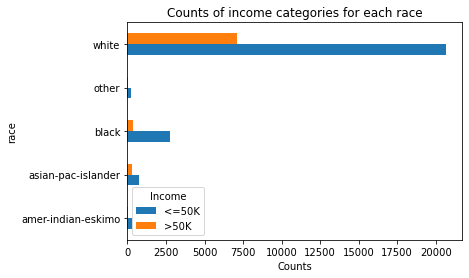

In [42]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['race', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each race')
plt.ylabel('race')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

7. sex

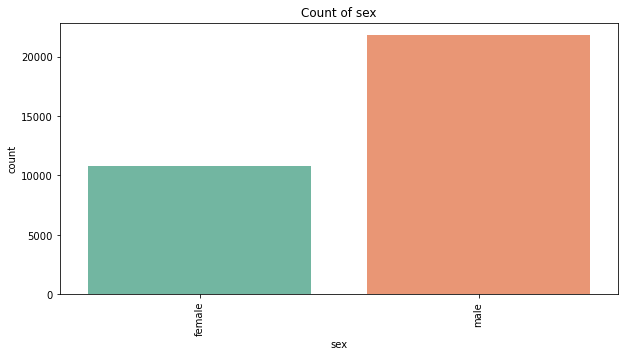

sex Summary:
male      21775
female    10762
Name: sex, dtype: int64
Unique values: 2




In [43]:
#Make casing consistent (lower-case)
df['sex'] = df['sex'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'sex')
analyze_stats_categorical(df,'sex')

- Count of Males is almost double that of Females

<Figure size 576x360 with 0 Axes>

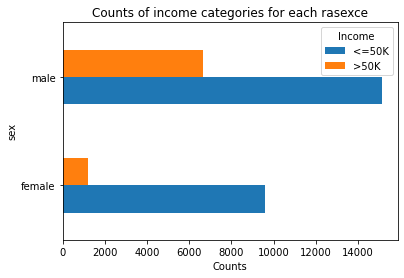

In [44]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['sex', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each rasexce')
plt.ylabel('sex')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

- It can be seen that count of males is much more than females in both categories of income.

8. native.country

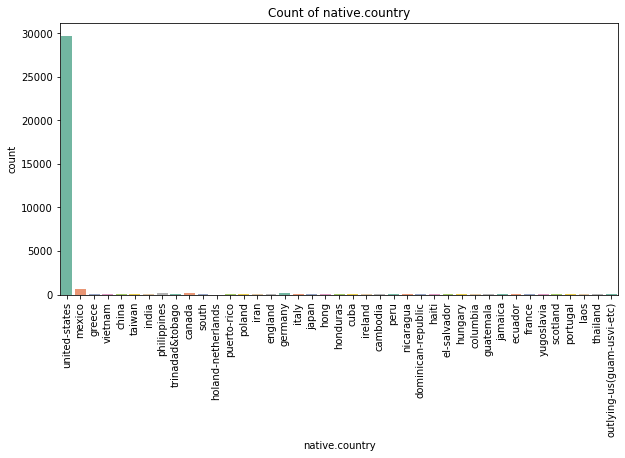

native.country Summary:
united-states                 29735
mexico                          639
philippines                     198
germany                         137
canada                          121
puerto-rico                     114
el-salvador                     106
india                           100
cuba                             95
england                          90
jamaica                          81
south                            80
china                            75
italy                            73
dominican-republic               70
vietnam                          67
guatemala                        62
japan                            62
poland                           60
columbia                         59
taiwan                           51
haiti                            44
iran                             43
portugal                         37
nicaragua                        34
peru                             31
greece                           29
fran

In [45]:
#Make casing consistent (lower-case)
df['native.country'] = df['native.country'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'native.country')
analyze_stats_categorical(df,'native.country')

<Figure size 576x360 with 0 Axes>

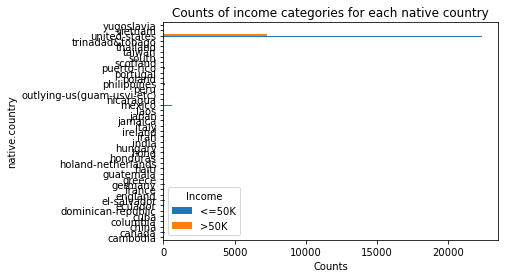

In [46]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['native.country', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each native country')
plt.ylabel('native.country')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

In [47]:
def visualize_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

def box_plot_for_column(df, col):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

def box_plot_col_target(df, col, target):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f'Box Plot of {col} by {target}')
    plt.xlabel(f'{target}')
    plt.ylabel(f'{col}')
    plt.show()

def min_max_mean_numerical(df, col):
    print(f"Minimum value in {col}: ", df[col].min())
    print(f"Maximum value in {col}: ", df[col].max())
    print(f"Mean value of {col}: ", df[col].mean())

## Numerical Columns

1. age

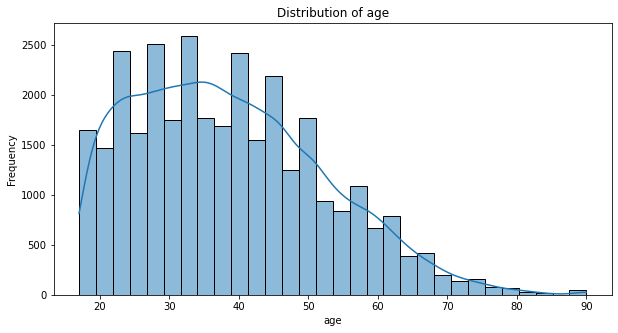

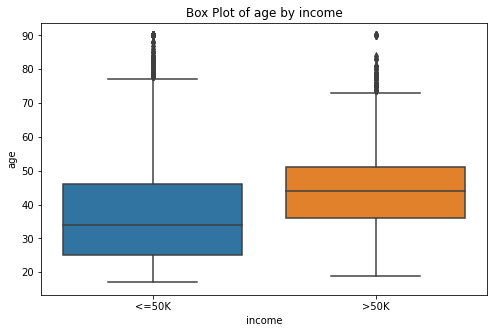

Minimum value in age:  17
Maximum value in age:  90
Mean value of age:  38.585548759873376


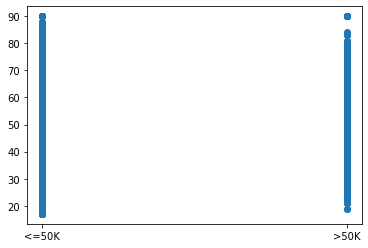

In [48]:
visualize_numerical_distribution(df, 'age')
box_plot_col_target(df, 'age', 'income')
plt.scatter(df['income'], df['age'])

min_max_mean_numerical(df, 'age')

- we can see that the median age for people earning >=50K is much greater than the median of people earning <50K.
- Thus people with higher age are more likely to earn >=50K a year as compared to people with lower age.

- It can be seen that age feature is right-skewed.
- Min Age is 17
- Max Age is 90
- Thus Range is from [17,90]

2. fnlwgt

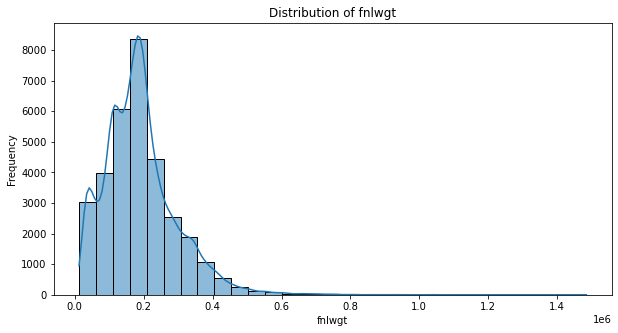

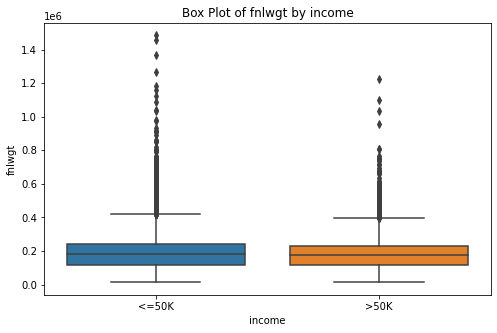

Minimum value in fnlwgt:  12285
Maximum value in fnlwgt:  1484705
Mean value of fnlwgt:  189780.84851092604


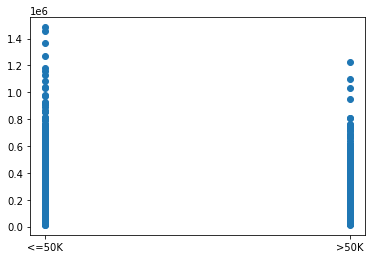

In [49]:
visualize_numerical_distribution(df, 'fnlwgt')
box_plot_col_target(df, 'fnlwgt', 'income')
plt.scatter(df['income'], df['fnlwgt'])

min_max_mean_numerical(df, 'fnlwgt')

- It can be seen that age feature is right-skewed.
- Min Age is 12285
- Max Age is 1484705
- Thus Range is from [12285,1484705]
- Outliers exist and should be removed using IQR

Before removing outliers: (32537, 18)
After IQR filtering: (31544, 18)


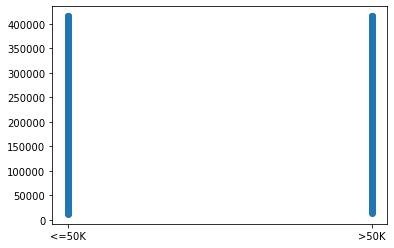

In [50]:
Q1_fw = df['fnlwgt'].quantile(0.25)
Q3_fw = df['fnlwgt'].quantile(0.75)

IQR_fw = Q3_fw - Q1_fw

lower_bound_fw = Q1_fw - 1.5 * IQR_fw
upper_bound_fw = Q3_fw + 1.5 * IQR_fw

print(f"Before removing outliers: {df.shape}")
df = df[(df['fnlwgt'] >= lower_bound_fw) & (df['fnlwgt'] <= upper_bound_fw)]
print(f"After IQR filtering: {df.shape}")

plt.scatter(df['income'], df['fnlwgt'])

Normalizing the fnlwgt column to avaoid unnecessary bias due to large values

In [51]:
min_fw = df['fnlwgt'].min()
max_fw = df['fnlwgt'].max()
df['fnlwgt_normalized'] = (df['fnlwgt']-min_fw)/(max_fw-min_fw)
df[['fnlwgt','fnlwgt_normalized']]

,fnlwgt,fnlwgt_normalized
0,77053,0.160547
1,132870,0.298906
2,186061,0.430756
3,140359,0.317470
4,264663,0.625595
...,...,...
32556,310152,0.738353
32557,257302,0.607348
32558,154374,0.352210
32559,151910,0.346102


3. education.num

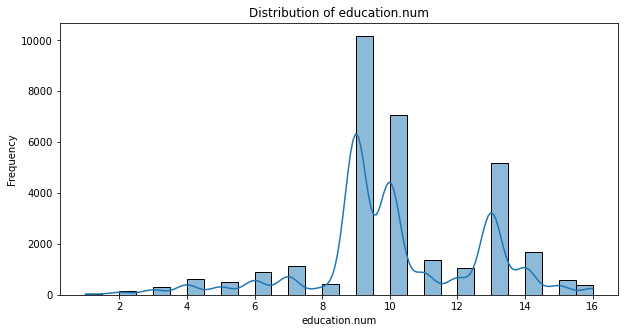

<Figure size 576x360 with 0 Axes>

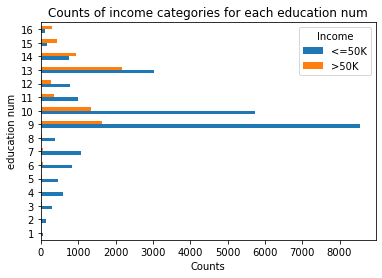

In [52]:
visualize_numerical_distribution(df, 'education.num')

plt.figure(figsize=(8, 5))
counts = df.groupby(['education.num', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each education num')
plt.ylabel('education num')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

4. capital.gain

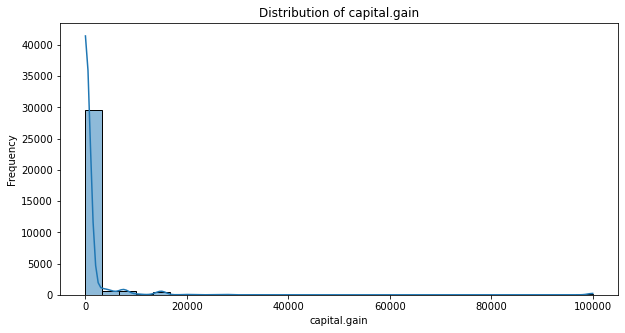

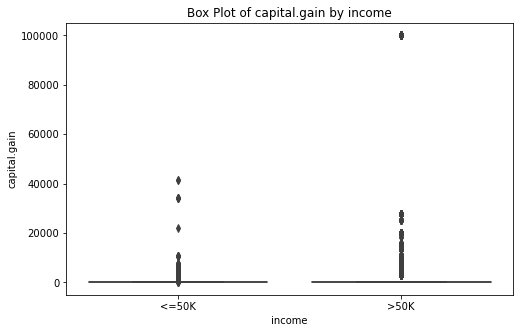

income
<=50K     149.918712
>50K     3995.353388
Name: capital.gain, dtype: float64


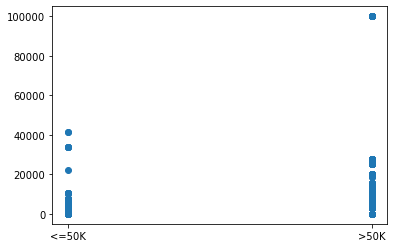

In [53]:
visualize_numerical_distribution(df, 'capital.gain')
box_plot_col_target(df, 'capital.gain', 'income')
plt.scatter(df['income'], df['capital.gain'])

capital_gain_mean = df.groupby('income')['capital.gain'].mean()
print(capital_gain_mean)

As seen from the scatter plot, outliers exists in Capital gains. Using IQR method to find the outliers

In [54]:
Q1_cg = df['capital.gain'].quantile(0.25)
Q3_cg = df['capital.gain'].quantile(0.75)

IQR_cg = Q3_cg - Q1_cg

lower_bound_cg = Q1_cg - 1.5 * IQR_cg
upper_bound_cg = Q3_cg + 1.5 * IQR_cg

print(f"Before removing outliers: {df.shape}")
df = df[(df['capital.gain'] >= lower_bound_cg) & (df['capital.gain'] <= upper_bound_cg)]
print(f"After IQR filtering: {df.shape}")

Before removing outliers: (31544, 19)
After IQR filtering: (28907, 19)


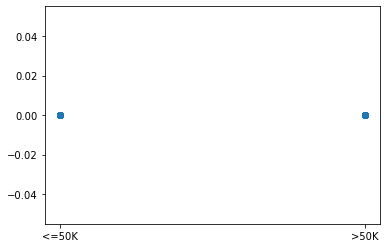

In [55]:
plt.scatter(df['income'], df['capital.gain'])

After removing outliers the only values left are 0s. The column can be safely dropped

Text(0, 0.5, 'count')

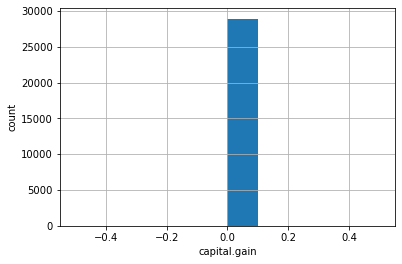

In [56]:
df['capital.gain'].hist(figsize=(6,4))
plt.xlabel('capital.gain')
plt.ylabel('count')

- Capital gain distribution is highly right skewed.
- We can see that the mean for capital gain of people with >50K income is more than mean of people with <=50K. It makes sense as prople with more money can have a greater compounding effect as a result of investing more
- The magnitude of this column is higer and thus needs to be normalized to avoid bias
- The column can even be ignored as most of the values are 0
- Some outliers are present

5. capital.loss

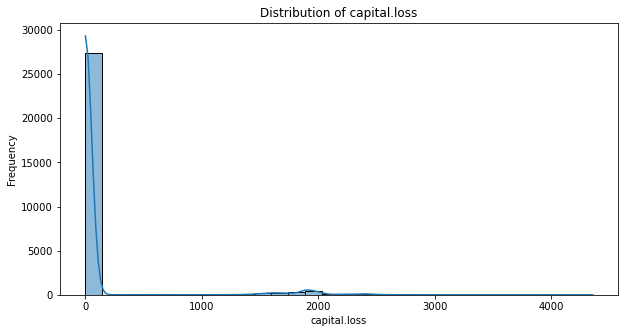

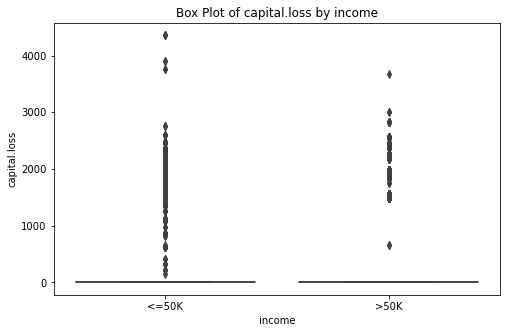

income
<=50K     55.986336
>50K     250.911833
Name: capital.loss, dtype: float64


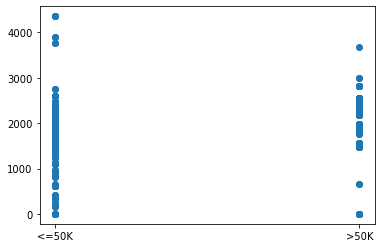

In [57]:
visualize_numerical_distribution(df, 'capital.loss')
box_plot_col_target(df, 'capital.loss', 'income')
plt.scatter(df['income'], df['capital.loss'])

capital_loss_mean = df.groupby('income')['capital.loss'].mean()
print(capital_loss_mean)

As seen there exist outliers and the distribution is heavily skewed. So we will use iqr method to remove outliers

In [58]:
Q1_cl = df['capital.loss'].quantile(0.25)
Q3_cl = df['capital.loss'].quantile(0.75)

IQR_cl = Q3_cl - Q1_cl

lower_bound_cl = Q1_cl - 1.5 * IQR_cl
upper_bound_cl = Q3_cl + 1.5 * IQR_cl

print(f"Before removing outliers: {df.shape}")
df = df[(df['capital.loss'] >= lower_bound_cl) & (df['capital.loss'] <= upper_bound_cl)]
print(f"After IQR filtering: {df.shape}")

Before removing outliers: (28907, 19)
After IQR filtering: (27418, 19)


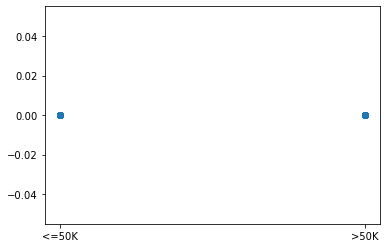

In [59]:
plt.scatter(df['income'], df['capital.loss'])

After removing outliers the only values left are 0s. The column can be safely dropped

Text(0, 0.5, 'count')

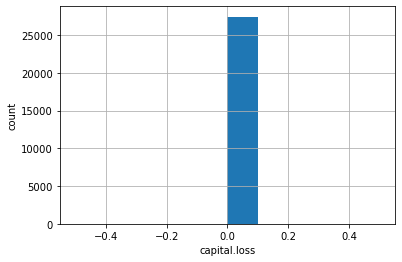

In [60]:
df['capital.loss'].hist(figsize=(6,4))
plt.xlabel('capital.loss')
plt.ylabel('count')

- Capital loss distribution is highly right skewed.
- We can see that the mean for capital loss of people with >50K income similar to the mean of people with <=50K.
- The magnitude of this column is higer and thus needs to be normalized to avoid bias
- The column can even be ignored as most of the values are 0
- Some outliers are present

6. hours.per.week

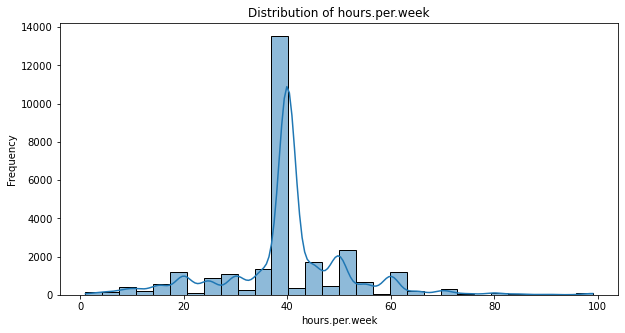

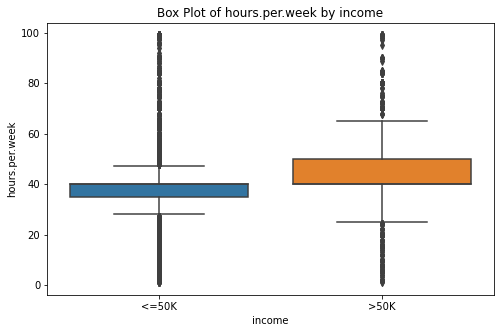

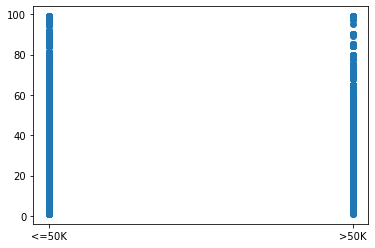

In [61]:
visualize_numerical_distribution(df, 'hours.per.week')
box_plot_col_target(df, 'hours.per.week', 'income')
plt.scatter(df['income'], df['hours.per.week'])

- The hours per week distribution seems normally distributed.
- Max count occurs for 30-40 hours
- Fewer number of people work for 80-100 hours. Might be outliers

## Visualization for categorical

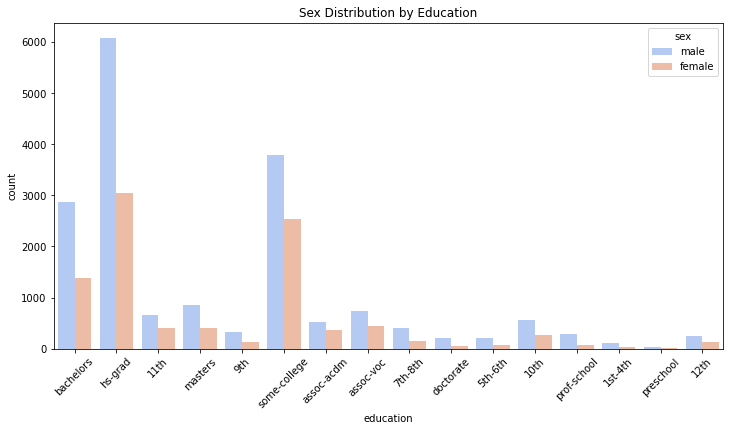

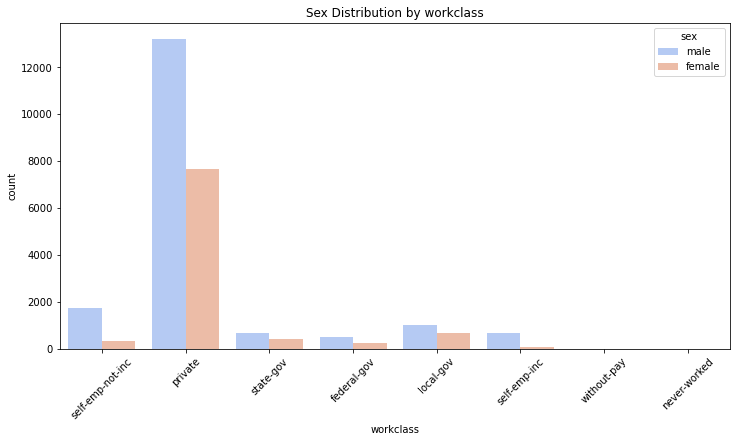

In [62]:
# Grouped bar plot: Education vs Sex
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='sex', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Sex Distribution by Education')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='workclass', hue='sex', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Sex Distribution by workclass')
plt.show()

1. Sex Distribution by Education - Count of males for eevry education category is greater than females

1. Sex Distribution by workclass - Count of males for eevry workclass category is greater than females

## Visualization for numerical

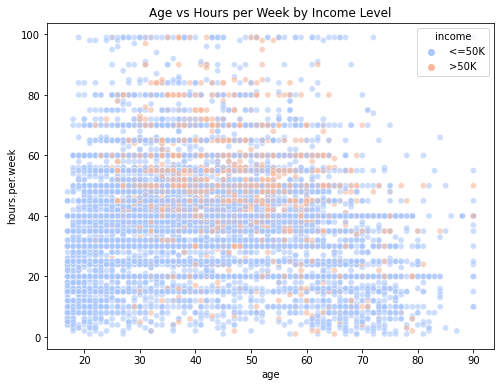

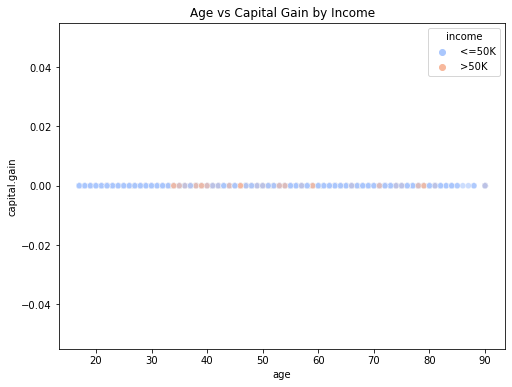

In [63]:
#Scatter plot of Age vs Hours per Week
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='hours.per.week', hue='income', palette='coolwarm', alpha=0.6)
plt.title('Age vs Hours per Week by Income Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='capital.gain', hue='income', palette='coolwarm', alpha=0.6)
plt.title('Age vs Capital Gain by Income')
plt.show()

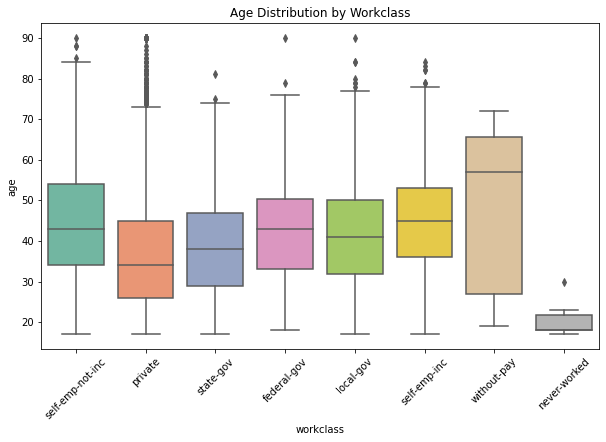

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='workclass', y='age', palette='Set2')
plt.xticks(rotation=45)
plt.title('Age Distribution by Workclass')
plt.show()

- Without pay work class has the highest mdeian age. It indicates retired people precense in the census.
- Median age of private is the lowest

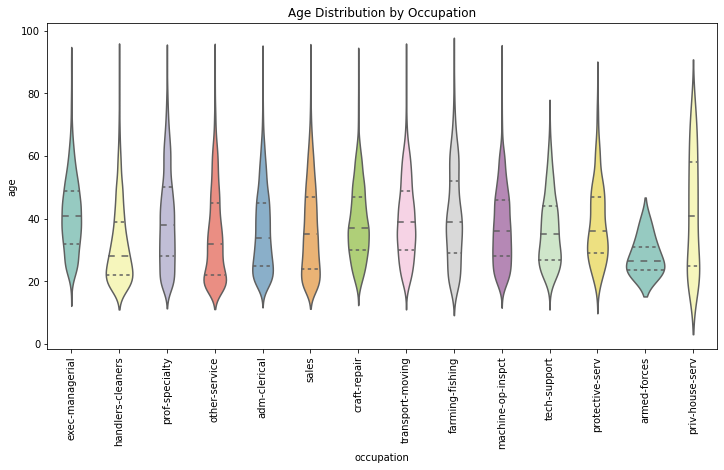

In [65]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='occupation', y='age', palette='Set3', inner='quartile')
plt.xticks(rotation=90)
plt.title('Age Distribution by Occupation')
plt.show()

- Occupations prof-speciality, excel-managerial,machine-op-inspect, transport-moving, farming-fishing is normally distributed across the ages.
- handlers-cleaners, other-service are more preferred by younger people.

In [66]:
print(df['age'].min(), df['age'].max())

17 90


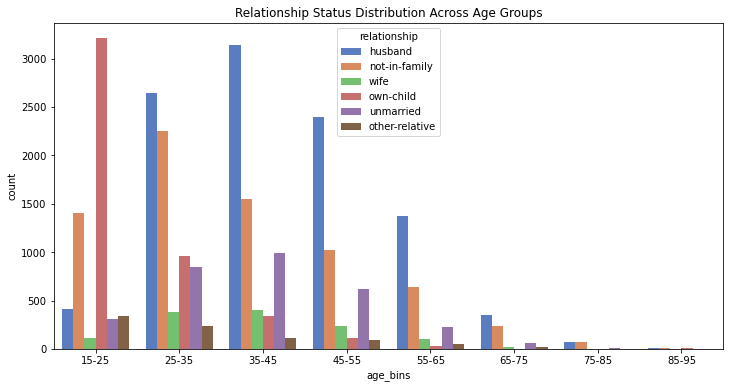

In [67]:
df['age_bins'] = pd.cut(df['age'], bins=[15, 25, 35, 45, 55, 65, 75, 85, 95], labels=['15-25', '25-35', '35-45', '45-55', '55-65', '65-75','75-85', '85-95'])
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_bins', hue='relationship', palette='muted')
plt.title('Relationship Status Distribution Across Age Groups')
plt.show()

- It is seen that husband relationship dominates 25-35, 35-40 ,45-55 age groups.
- 15-25 is dominated by own-child

Correlation Matrices

1. Numerical features

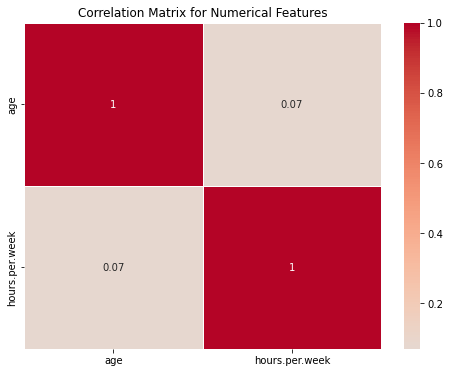

In [68]:
corr_matrix = df[['age', 'hours.per.week']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


- Weak correlation between hours per week and age. Indicates lower age group works for more hours per week

2. Numerical with target

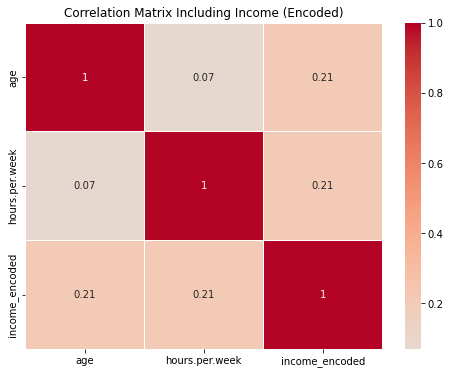

In [69]:
corr_matrix_full = df[['age', 'hours.per.week', 'income_encoded']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix Including Income (Encoded)')
plt.show()

- Moderate correlation indicates that income is higher for individuals working more hours in a week
- Moderate correlation indicates higher income for higher age

In [70]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'capital_diff', 'income_encoded', 'education_group',
       'fnlwgt_normalized', 'age_bins'],
      dtype='object')

In [71]:
df_final = df[['workclass', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country','capital_diff', 'income_encoded', 'education_group',
       'fnlwgt_normalized', 'age_bins']] #education.num
df_final

,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,capital_diff,income_encoded,education_group,fnlwgt_normalized,age_bins
4231,self-emp-not-inc,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,Low,0,bachelors,0.176059,45-55
4232,private,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,Low,0,hs-grad,0.504091,35-45
4233,private,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,Low,0,middle-School,0.551374,45-55
4234,private,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,Low,0,bachelors,0.808396,25-35
4235,private,14,married-civ-spouse,exec-managerial,wife,white,female,0,0,40,united-states,Low,0,Others,0.674970,35-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,private,10,never-married,protective-serv,not-in-family,white,male,0,0,40,united-states,Low,0,Others,0.738353,15-25
32557,private,12,married-civ-spouse,tech-support,wife,white,female,0,0,38,united-states,Low,0,Others,0.607348,25-35
32558,private,9,married-civ-spouse,machine-op-inspct,husband,white,male,0,0,40,united-states,Low,1,hs-grad,0.352210,35-45
32559,private,9,widowed,adm-clerical,unmarried,white,female,0,0,40,united-states,Low,0,hs-grad,0.346102,55-65


In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay

In [73]:
# relationship_encoder = LabelEncoder()
# df['relationship_encoded'] = relationship_encoder.fit_transform(df['relationship'])

# race_encoder = LabelEncoder()
# df['race_encoded'] = race_encoder.fit_transform(df['race'])

# sex_encoder = LabelEncoder()
# df['sex_encoded'] = sex_encoder.fit_transform(df['sex'])

# martial_stat_encoder = LabelEncoder()
# df['marital.status_encoded'] = martial_stat_encoder.fit_transform(df['marital.status'])

# workclass_encoder = LabelEncoder()
# df['workclass_encoded'] = workclass_encoder.fit_transform(df['workclass'])

# occupation_encoder = LabelEncoder()
# df['occupation_encoded'] = occupation_encoder.fit_transform(df['occupation'])

In [74]:
df = pd.get_dummies(df, columns=['relationship', 'race', 'sex', 'marital.status', 'workclass', 'occupation'])

In [75]:
education_encoder = OrdinalEncoder(categories=[['primary','middle-School','hs-grad','Others','bachelors','phd']])
df['education_group_encoded'] = education_encoder.fit_transform(df[['education_group']])

capital_diff_encoder = OrdinalEncoder(categories=[['Low','High']])
df['capital_diff_encoded'] = capital_diff_encoder.fit_transform(df[['capital_diff']])

# age_bins_encoder = OrdinalEncoder(categories=[['15-25', '25-35', '35-45', '45-55', '55-65', '65-75','75-85','85-95']])
# df['age_bins_encoded'] = age_bins_encoder.fit_transform(df[['age_bins']])

In [76]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education.num', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income',
       'capital_diff', 'income_encoded', 'education_group',
       'fnlwgt_normalized', 'age_bins', 'relationship_husband',
       'relationship_not-in-family', 'relationship_other-relative',
       'relationship_own-child', 'relationship_unmarried', 'relationship_wife',
       'race_amer-indian-eskimo', 'race_asian-pac-islander', 'race_black',
       'race_other', 'race_white', 'sex_female', 'sex_male',
       'marital.status_divorced', 'marital.status_married-af-spouse',
       'marital.status_married-civ-spouse',
       'marital.status_married-spouse-absent', 'marital.status_never-married',
       'marital.status_separated', 'marital.status_widowed',
       'workclass_federal-gov', 'workclass_local-gov',
       'workclass_never-worked', 'workclass_private', 'workclass_self-emp-inc',
       'workclass_self-emp-not-inc', 'workclass_state-gov',
    

In [77]:
# df_final = df[['education.num','hours.per.week','income_encoded',
#        'relationship_encoded', 'race_encoded',
#        'sex_encoded', 'marital.status_encoded', 'workclass_encoded',
#        'occupation_encoded', 'education_group_encoded',
#        'capital_diff_encoded']]

df_final = df[['education.num','hours.per.week','income_encoded','relationship_husband',
       'relationship_not-in-family', 'relationship_other-relative',
       'relationship_own-child', 'relationship_unmarried', 'relationship_wife',
       'race_amer-indian-eskimo', 'race_asian-pac-islander', 'race_black',
       'race_other', 'race_white', 'sex_female', 'sex_male',
       'marital.status_divorced', 'marital.status_married-af-spouse',
       'marital.status_married-civ-spouse',
       'marital.status_married-spouse-absent', 'marital.status_never-married',
       'marital.status_separated', 'marital.status_widowed',
       'workclass_federal-gov', 'workclass_local-gov',
       'workclass_never-worked', 'workclass_private', 'workclass_self-emp-inc',
       'workclass_self-emp-not-inc', 'workclass_state-gov',
       'workclass_without-pay', 'occupation_adm-clerical',
       'occupation_armed-forces', 'occupation_craft-repair',
       'occupation_exec-managerial', 'occupation_farming-fishing',
       'occupation_handlers-cleaners', 'occupation_machine-op-inspct',
       'occupation_other-service', 'occupation_priv-house-serv',
       'occupation_prof-specialty', 'occupation_protective-serv',
       'occupation_sales', 'occupation_tech-support',
       'occupation_transport-moving', 'education_group_encoded',
       'capital_diff_encoded', 'age']]

df_final

,education.num,hours.per.week,income_encoded,relationship_husband,relationship_not-in-family,relationship_other-relative,relationship_own-child,relationship_unmarried,relationship_wife,race_amer-indian-eskimo,...,occupation_other-service,occupation_priv-house-serv,occupation_prof-specialty,occupation_protective-serv,occupation_sales,occupation_tech-support,occupation_transport-moving,education_group_encoded,capital_diff_encoded,age
4231,13,13,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,0.0,50
4232,9,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,0.0,38
4233,7,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,53
4234,13,40,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,4.0,0.0,28
4235,14,40,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,3.0,0.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,40,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,3.0,0.0,22
32557,12,38,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,3.0,0.0,27
32558,9,40,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,0.0,40
32559,9,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2.0,0.0,58


In [78]:
# features = ['education.num','hours.per.week','fnlwgt_normalized', 'relationship_encoded', 'race_encoded','sex_encoded', 'marital.status_encoded', 'workclass_encoded',
#        'occupation_encoded', 'education_group_encoded',
#        'capital_diff_encoded']
features = ['education.num','hours.per.week',
       'relationship_husband',
       'relationship_not-in-family', 'relationship_other-relative',
       'relationship_own-child', 'relationship_unmarried', 'relationship_wife',
       'race_amer-indian-eskimo', 'race_asian-pac-islander', 'race_black',
       'race_other', 'race_white', 'sex_female', 'sex_male',
       'marital.status_divorced', 'marital.status_married-af-spouse',
       'marital.status_married-civ-spouse',
       'marital.status_married-spouse-absent', 'marital.status_never-married',
       'marital.status_separated', 'marital.status_widowed',
       'workclass_federal-gov', 'workclass_local-gov',
       'workclass_never-worked', 'workclass_private', 'workclass_self-emp-inc',
       'workclass_self-emp-not-inc', 'workclass_state-gov',
       'workclass_without-pay', 'occupation_adm-clerical',
       'occupation_armed-forces', 'occupation_craft-repair',
       'occupation_exec-managerial', 'occupation_farming-fishing',
       'occupation_handlers-cleaners', 'occupation_machine-op-inspct',
       'occupation_other-service', 'occupation_priv-house-serv',
       'occupation_prof-specialty', 'occupation_protective-serv',
       'occupation_sales', 'occupation_tech-support',
       'occupation_transport-moving', 'education_group_encoded',
       'capital_diff_encoded', 'age']
target = ['income_encoded']
X = df_final[features]
y = df_final[target].values.flatten()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Logistic Regression

In [80]:
logreg_model = LogisticRegression(max_iter=2000)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)
y_pred_probability = logreg_model.predict_proba(X_test)

logreg_f1 = f1_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


In [81]:
coefficients = logreg_model.coef_[0]

feature_biases = pd.DataFrame({'Feature_Names': X_train.columns, 'Bias': coefficients})

logreg_bias = feature_biases.sort_values(by='Bias', ascending=False)
logreg_bias.head()

,Feature_Names,Bias
17,marital.status_married-civ-spouse,1.370595
16,marital.status_married-af-spouse,1.327398
7,relationship_wife,1.318929
33,occupation_exec-managerial,0.972313
22,workclass_federal-gov,0.897647


In [169]:
def evaluation(model, X_train, y_train, X_test, y_test, name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("-----------------------Evaluation Starts------------------")

    print(f"Evaluation For {name} Test")
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))

    print("--------------------------------------------------------------------------------------------")

    print(f"Evaluation For {name} Train")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

    print("-----------------------Evaluation Ends------------------")

def crossValidation(model, splits, scoring_list, X_train, y_train):
    cv = StratifiedKFold(n_splits=splits)

    scores = cross_validate(model,
                            X_train,
                            y_train,
                            scoring=scoring_list,
                            cv=cv,
                            return_train_score=True)

    df_scores = pd.DataFrame(scores, index=range(1, splits+1)) 
    return df_scores.mean()[2:]

def printRocAucCurve(model, X_test, y_test, y_pred_probability, name):
    if("Log" in name):
        print('Logistic Regression ROC-AUC Score:', roc_auc_score(y_test, y_pred_probability[:,1]))
    elif("SVM" in name):
        print('SVM ROC-AUC Score:', roc_auc_score(y_test, y_pred_probability))
    print('--------------------------------------------------')

    logreg_matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='BuPu')

    logreg_prCurve = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    return logreg_matrix,logreg_prCurve

In [83]:
evaluation(logreg_model, X_train, y_train, X_test, y_test, 'Logistic Regression')

-----------------------Evaluation Starts------------------
Evaluation For Logistic Regression Test
[[4181  271]
 [ 543  489]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4452
           1       0.64      0.47      0.55      1032

    accuracy                           0.85      5484
   macro avg       0.76      0.71      0.73      5484
weighted avg       0.84      0.85      0.84      5484

--------------------------------------------------------------------------------------------
Evaluation For Logistic Regression Train
[[16693  1034]
 [ 2166  2041]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     17727
           1       0.66      0.49      0.56      4207

    accuracy                           0.85     21934
   macro avg       0.77      0.71      0.74     21934
weighted avg       0.84      0.85      0.85     21934

-----------------------Evaluation Ends-----------------

Logistic Regression ROC-AUC Score: 0.8834155627294066
--------------------------------------------------


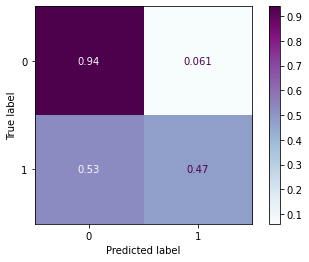

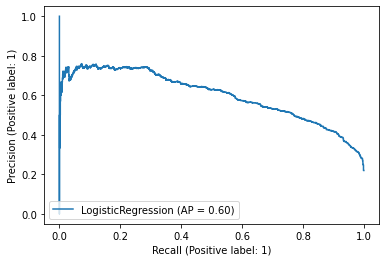

In [84]:
print('Logistic Regression ROC-AUC Score:', roc_auc_score(y_test, y_pred_probability[:,1]))
print('--------------------------------------------------')

logreg_matrix = ConfusionMatrixDisplay.from_estimator(logreg_model, X_test, y_test, normalize='true', cmap='BuPu')

logreg_prCurve = PrecisionRecallDisplay.from_estimator(logreg_model, X_test, y_test)

### Tuning using cross validation

In [85]:
# Cross Validation Scores of the Model Performance

crossval_logreg_model = LogisticRegression(max_iter=2000)

cv = StratifiedKFold(n_splits=10) # for unbalanced data validation

scores = cross_validate(crossval_logreg_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11)) 
df_scores.mean()[2:]

test_accuracy      0.853424
train_accuracy     0.853824
test_precision     0.662228
train_precision    0.662717
test_recall        0.482770
train_recall       0.484431
test_f1            0.558109
train_f1           0.559715
dtype: float64

In [86]:
logreg_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 2000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Tuning using grid search cv

In [87]:
gs_model = LogisticRegression(max_iter = 2000)

 
classWeights= ["balanced", None]
C  = [0.01, 0.1, 1]

param_grid = [
    {
        "penalty" : ['l2'],
        "C" : C,
        "class_weight": classWeights,
        "solver": ['sag', 'lbfgs']
    },
    {
        "penalty" : ['l1', 'l2'],
        "C" : C,
        "class_weight": classWeights,
        "solver": ['liblinear', 'saga']
    }
]

cv = StratifiedKFold(n_splits = 5)

grid_model = GridSearchCV(gs_model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   
                          n_jobs = -1,
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [88]:
print('Best Params:', grid_model.best_params_)
print('Best Recall Score(test):', grid_model.best_score_)
print('Best Score Index:', grid_model.best_index_)

Best Params: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best Recall Score(test): 0.8706945978235389
Best Score Index: 12


In [89]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_ , ["mean_test_score", "mean_train_score"]]

mean_test_score     0.870695
mean_train_score    0.872118
Name: 12, dtype: object

In [90]:
y_pred_gs=grid_model.predict(X_test)
y_pred_probability_gs = grid_model.predict_proba(X_test)


log_grid_f1 = f1_score(y_test, y_pred_gs)
log_grid_recall = recall_score(y_test, y_pred_gs)
log_grid_auc = roc_auc_score(y_test, y_pred_gs)
accuracy = accuracy_score(y_test, y_pred_gs)
accuracy

0.7558351568198395

In [91]:
evaluation(grid_model, X_train, y_train, X_test, y_test, 'Logistic Regression Gridsearch CV')

-----------------------Evaluation Starts------------------
Evaluation For Logistic Regression Gridsearch CV Test
[[3255 1197]
 [ 142  890]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      4452
           1       0.43      0.86      0.57      1032

    accuracy                           0.76      5484
   macro avg       0.69      0.80      0.70      5484
weighted avg       0.86      0.76      0.78      5484

--------------------------------------------------------------------------------------------
Evaluation For Logistic Regression Gridsearch CV Train
[[12941  4786]
 [  540  3667]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     17727
           1       0.43      0.87      0.58      4207

    accuracy                           0.76     21934
   macro avg       0.70      0.80      0.70     21934
weighted avg       0.86      0.76      0.78     21934

-----------------------Eval

Logistic Regression Grid Search ROC AUC Score: 0.8753246298153603
--------------------------------------------------


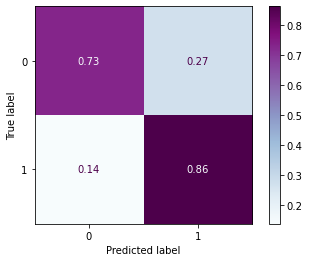

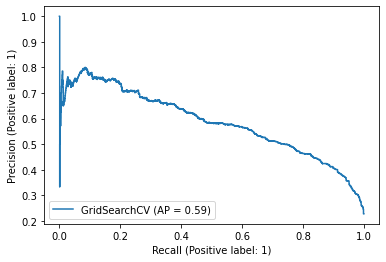

In [92]:
# Roc_AUC_score
print('Logistic Regression Grid Search ROC AUC Score:', roc_auc_score(y_test, y_pred_probability_gs[:,1]))
print('--------------------------------------------------')


grid_logreg_matrix = ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test, normalize='true', cmap='BuPu')#confusion matrix

grid_logreg_prCurve = PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)#Precision-Recall

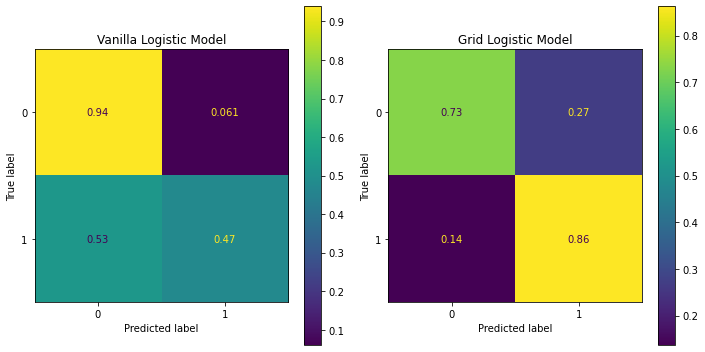

In [93]:
# Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10,5))

logreg_matrix.plot(ax=ax[0])
ax[0].set_title("Vanilla Logistic Model")
grid_logreg_matrix.plot(ax=ax[1])
ax[1].set_title("Grid Logistic Model")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Grid Model - Precision Recall Curve')

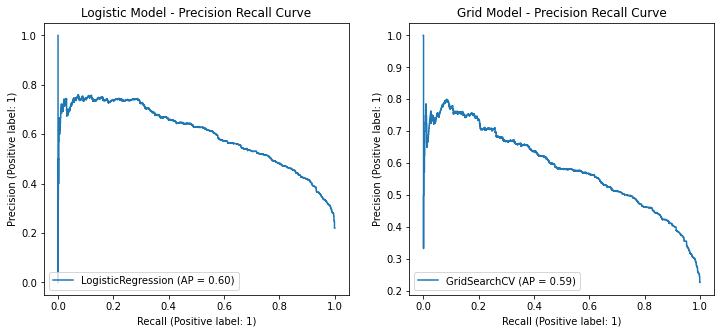

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

logreg_prCurve.plot(ax=ax[0])
ax[0].set_title("Logistic Model - Precision Recall Curve")
grid_logreg_prCurve.plot(ax=ax[1])
ax[1].set_title("Grid Model - Precision Recall Curve")

## KNN

In [97]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_probability = knn.predict_proba(X_test)

logreg_f1 = f1_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


In [98]:
evaluation(knn, X_train, y_train, X_test, y_test, 'knn_model')

-----------------------Evaluation Starts------------------
Evaluation For knn_model Test
[[4026  426]
 [ 549  483]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4452
           1       0.53      0.47      0.50      1032

    accuracy                           0.82      5484
   macro avg       0.71      0.69      0.69      5484
weighted avg       0.81      0.82      0.82      5484

--------------------------------------------------------------------------------------------
Evaluation For knn_model Train
[[16705  1022]
 [ 1600  2607]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     17727
           1       0.72      0.62      0.67      4207

    accuracy                           0.88     21934
   macro avg       0.82      0.78      0.80     21934
weighted avg       0.88      0.88      0.88     21934

-----------------------Evaluation Ends------------------


knn_model ROC_AUC Score: 0.817855793407022
--------------------------------------------------


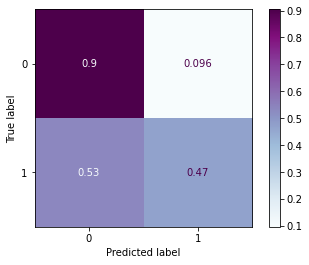

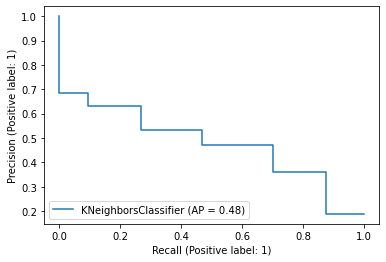

In [ ]:
print('knn_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_probability[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
knn_matrix = ConfusionMatrixDisplay.from_estimator(knn, X_test,y_test, normalize='true', cmap='BuPu')

# Precision-Recall Curve
knn_prCurve = PrecisionRecallDisplay.from_estimator(knn, X_test, y_test)

In [ ]:
test_error_rates = []

for k in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, scoring = ['recall'], cv = 10)
    recall_mean = scores["test_recall"].mean() 
    test_error = 1 - recall_mean
    test_error_rates.append(test_error)
    

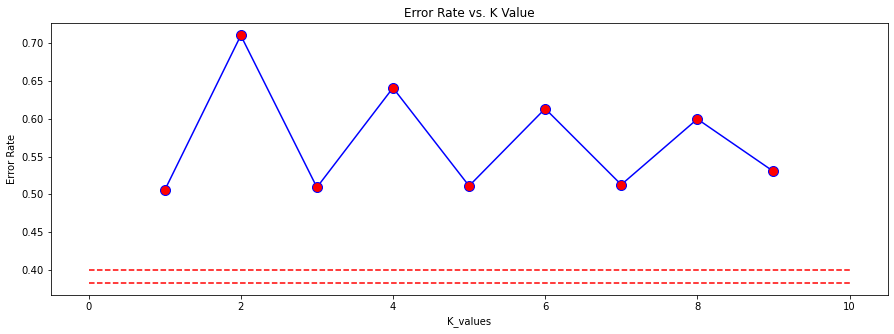

In [101]:
plt.figure(figsize=(15,5))
plt.plot(range(1,10), test_error_rates, color='blue', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.4, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.383, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

In [102]:
test_error_rates = []
train_error_rates = []

for k in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train) 
    
    scores = cross_validate(knn, X_train, y_train, scoring = ['recall'], cv = 10, return_train_score=True)
    
    recall_test_mean = scores["test_recall"].mean() 
    recall_train_mean = scores["train_recall"].mean() 

    
    test_error = 1 - recall_test_mean
    train_error = 1 - recall_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

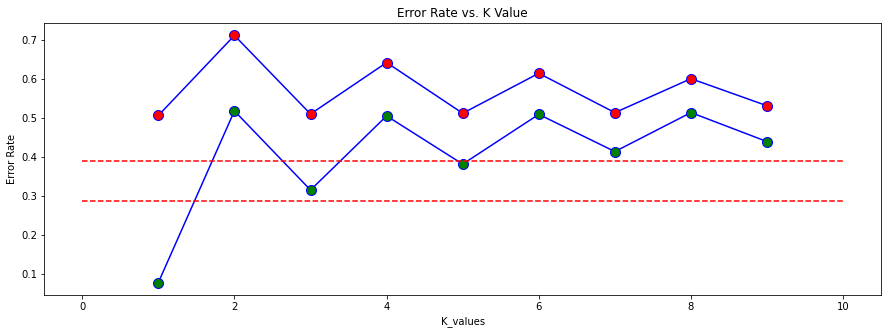

In [103]:
plt.figure(figsize=(15,5))
plt.plot(range(1,10), test_error_rates, color='blue', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,10), train_error_rates, color='blue', marker='o',
         markerfacecolor='green', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.39, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.286, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

In [104]:
#Cross Validation, k=7;
model = KNeighborsClassifier(n_neighbors=7)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.835689
train_accuracy     0.872734
test_precision     0.586109
train_precision    0.700849
test_recall        0.487287
train_recall       0.587064
test_f1            0.531964
train_f1           0.638921
dtype: float64

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

In [110]:
model =  KNeighborsClassifier()

k_values = range(1,10)

param_grid = {
        "n_neighbors": k_values,
        "metric": ['minkowski'],
        "p": [1, 2],
        "weights": ['uniform', 'distance']
        }


knn_grid_model = GridSearchCV(model,
                              param_grid,
                              scoring='recall',
                              cv=5,
                              n_jobs= -1,
                              verbose=1,
                              return_train_score=True).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
print('Best Params:', knn_grid_model.best_params_)
print('Best Recall Score(test):', knn_grid_model.best_score_)
print('Best Score index:', knn_grid_model.best_index_)

Best Params: {'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Recall Score(test): 0.5039230528072846
Best Score index: 24


In [ ]:
pd.DataFrame(knn_grid_model.cv_results_).loc[10, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.489425
mean_train_score    0.687248
Name: 10, dtype: object

In [113]:
y_pred = knn_grid_model.predict(X_test)
y_pred_proba = knn_grid_model.predict_proba(X_test)

# Scores to compare the models at the end.
knn_grid_f1 = f1_score(y_test, y_pred)
knn_grid_recall = recall_score(y_test, y_pred)
knn_grid_auc = roc_auc_score(y_test, y_pred)

In [115]:
evaluation(knn_grid_model, X_train, y_train, X_test, y_test,'knn_model')

-----------------------Evaluation Starts------------------
Evaluation For knn_model Test
[[4075  377]
 [ 525  507]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4452
           1       0.57      0.49      0.53      1032

    accuracy                           0.84      5484
   macro avg       0.73      0.70      0.71      5484
weighted avg       0.83      0.84      0.83      5484

--------------------------------------------------------------------------------------------
Evaluation For knn_model Train
[[16667  1060]
 [ 1676  2531]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     17727
           1       0.70      0.60      0.65      4207

    accuracy                           0.88     21934
   macro avg       0.81      0.77      0.79     21934
weighted avg       0.87      0.88      0.87     21934

-----------------------Evaluation Ends------------------


knn_grid_model ROC_AUC Score: 0.8407198315189758
--------------------------------------------------


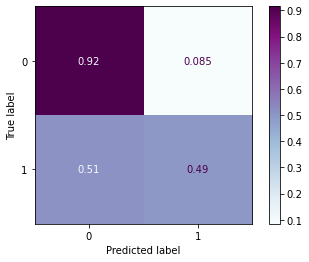

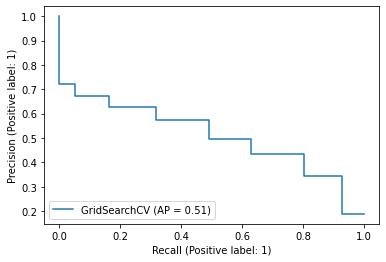

In [116]:
print('knn_grid_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
knn_grid_matrix = ConfusionMatrixDisplay.from_estimator(knn_grid_model, X_test,y_test, normalize='true', cmap='BuPu' )

# Precision-Recall Curve
knn_grid_prCurve = PrecisionRecallDisplay.from_estimator(knn_grid_model, X_test, y_test)

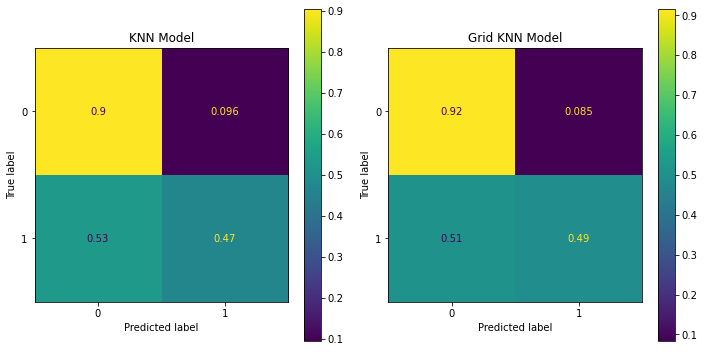

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

knn_matrix.plot(ax=ax[0])
ax[0].set_title("KNN Model")
knn_grid_matrix.plot(ax=ax[1])
ax[1].set_title("Grid KNN Model")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'KNN Grid Model - Precision Recall Curve')

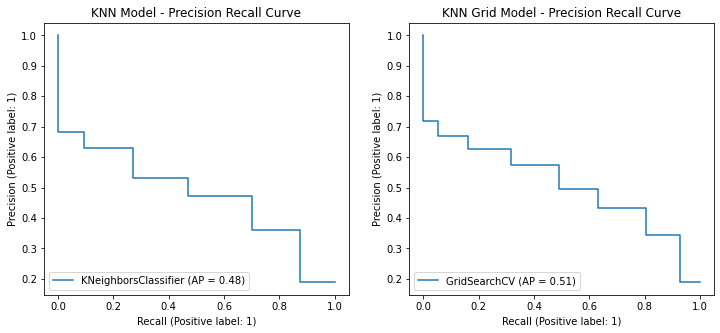

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

knn_prCurve.plot(ax=ax[0])
ax[0].set_title("KNN Model - Precision Recall Curve")
knn_grid_prCurve.plot(ax=ax[1])
ax[1].set_title("KNN Grid Model - Precision Recall Curve")

## Decision Tree(Pyspark)

In [124]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark_df = spark.createDataFrame(df_final)
spark_df.show()

+-------------+--------------+--------------+--------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------+-----------------------+-----------------------+----------+----------+----------+----------+--------+-----------------------+--------------------------------+---------------------------------+------------------------------------+----------------------------+------------------------+----------------------+---------------------+-------------------+----------------------+-----------------+----------------------+--------------------------+-------------------+---------------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+----------------------------+----------------------------+------------------------+--------------------------+-------------------------+--------------------------+----------------+-----------------------+----

In [125]:
import numpy as np
import pandas as pd 
import os
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

from pyspark.sql.functions import round
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

In [132]:
for col in df.columns:
    spark_df = spark_df.withColumnRenamed(col, col.replace('.', '_'))
spark_df.columns

['education_num',
 'hours_per_week',
 'income_encoded',
 'relationship_husband',
 'relationship_not-in-family',
 'relationship_other-relative',
 'relationship_own-child',
 'relationship_unmarried',
 'relationship_wife',
 'race_amer-indian-eskimo',
 'race_asian-pac-islander',
 'race_black',
 'race_other',
 'race_white',
 'sex_female',
 'sex_male',
 'marital_status_divorced',
 'marital_status_married-af-spouse',
 'marital_status_married-civ-spouse',
 'marital_status_married-spouse-absent',
 'marital_status_never-married',
 'marital_status_separated',
 'marital_status_widowed',
 'workclass_federal-gov',
 'workclass_local-gov',
 'workclass_never-worked',
 'workclass_private',
 'workclass_self-emp-inc',
 'workclass_self-emp-not-inc',
 'workclass_state-gov',
 'workclass_without-pay',
 'occupation_adm-clerical',
 'occupation_armed-forces',
 'occupation_craft-repair',
 'occupation_exec-managerial',
 'occupation_farming-fishing',
 'occupation_handlers-cleaners',
 'occupation_machine-op-inspct',

In [148]:
df = spark_df.withColumnRenamed('income_encoded','label')

In [150]:
cls = df.columns
updated_columns = [col for col in cls if col != 'label']

In [ ]:
assembler = VectorAssembler(inputCols = updated_columns, outputCol='features')
adults = assembler.transform(df)
adults.select('features', 'label').show(5, truncate=False)

+------------------------------------------------------------------------------+-----+
|features                                                                      |label|
+------------------------------------------------------------------------------+-----+
|(47,[0,1,2,12,14,17,27,33,44,46],[13.0,13.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,50.0])|0    |
|(47,[0,1,3,12,14,15,25,35,44,46],[9.0,40.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,38.0]) |0    |
|(47,[0,1,2,10,14,17,25,35,44,46],[7.0,40.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,53.0]) |0    |
|(47,[0,1,7,10,13,17,25,39,44,46],[13.0,40.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,28.0])|0    |
|(47,[0,1,7,12,13,17,25,33,44,46],[14.0,40.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,37.0])|0    |
+------------------------------------------------------------------------------+-----+
only showing top 5 rows



In [ ]:
income_train, income_test = adults.randomSplit([0.8, 0.2], seed=42)
training_ratio = income_train.count() / adults.count()
print(training_ratio)

0.8044715150630972


In [ ]:
tree = DecisionTreeClassifier()
tree_model = tree.fit(income_train)
prediction = tree_model.transform(income_test)
prediction.select('label', 'prediction', 'probability').show(5, False)

+-----+----------+-----------------------------------------+
|label|prediction|probability                              |
+-----+----------+-----------------------------------------+
|0    |0.0       |[0.9848394413274442,0.015160558672555807]|
|0    |0.0       |[0.9848394413274442,0.015160558672555807]|
|0    |0.0       |[0.7152737752161383,0.28472622478386167] |
|0    |0.0       |[0.9848394413274442,0.015160558672555807]|
|1    |0.0       |[0.7152737752161383,0.28472622478386167] |
+-----+----------+-----------------------------------------+
only showing top 5 rows



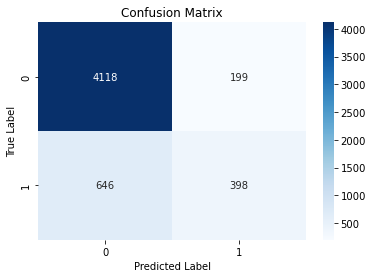

In [ ]:
pandas_df = prediction.select("label", "prediction").toPandas()
cm = confusion_matrix(pandas_df["label"], pandas_df["prediction"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
prediction.groupBy('label', 'prediction').count().show()
TN = prediction.filter('prediction = 0 AND label = prediction').count()
TP = prediction.filter('prediction = 1 AND label = prediction').count()
FN = prediction.filter('prediction = 0 AND label != prediction').count()
FP = prediction.filter('prediction = 1 AND label != prediction').count()
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|  646|
|    0|       1.0|  199|
|    0|       0.0| 4118|
|    1|       1.0|  398|
+-----+----------+-----+

0.842380152956538


In [157]:
recall = (TP) / (TP+FN)
precision = (TP) / (TP+FP)
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-score: ', (2*precision*recall)/(precision+recall))

Accuracy:  0.842380152956538
Precision:  0.6666666666666666
Recall:  0.38122605363984674
F1-score:  0.48507007921998774


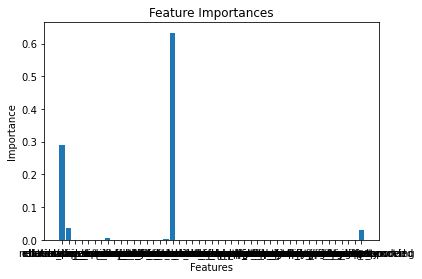

In [ ]:
feature_importances = tree_model.featureImportances.toArray()
plt.bar(updated_columns, feature_importances)
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [165]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(prediction)
print("Area Under ROC Curve:", auc)

Area Under ROC Curve: 0.7061662348888872


In [167]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Convert to RDD for BinaryClassificationMetrics
rdd = prediction.select("probability", "label").rdd.map(lambda row: (float(row[0]), float(row[1])))
metrics = BinaryClassificationMetrics(rdd)

# ROC curve points
roc = metrics.roc().collect()
fpr, tpr = zip(*roc)

# Step 5: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

c:\Users\susim\anaconda3\lib\site-packages\pyspark\sql\context.py:158: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.



Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 73.0 failed 1 times, most recent failure: Lost task 0.0 in stage 73.0 (TID 305) (LAPTOP-F205230E executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker.py", line 1247, in main
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker.py", line 1239, in process
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "c:\Users\susim\anaconda3\lib\site-packages\pyspark\rdd.py", line 2849, in takeUpToNumLeft
    yield next(iterator)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\serializers.py", line 152, in load_stream
    yield self._read_with_length(stream)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\serializers.py", line 174, in _read_with_length
    return self.loads(obj)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\serializers.py", line 472, in loads
    return cloudpickle.loads(obj, encoding=encoding)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1377, in _parse_datatype_json_string
    return _parse_datatype_json_value(json.loads(json_string))
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1419, in _parse_datatype_json_value
    return _all_complex_types[tpe].fromJson(json_value)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1017, in fromJson
    return StructType([StructField.fromJson(f) for f in json["fields"]])
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1017, in <listcomp>
    return StructType([StructField.fromJson(f) for f in json["fields"]])
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 708, in fromJson
    _parse_datatype_json_value(json["type"]),
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1421, in _parse_datatype_json_value
    return UserDefinedType.fromJson(json_value)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1205, in fromJson
    m = __import__(pyModule, globals(), locals(), [pyClass])
  File "<frozen zipimport>", line 259, in load_module
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\ml\__init__.py", line 22, in <module>
    from pyspark.ml.base import (
  File "<frozen zipimport>", line 259, in load_module
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\ml\base.py", line 40, in <module>
    from pyspark.ml.param import P
  File "<frozen zipimport>", line 259, in load_module
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\ml\param\__init__.py", line 32, in <module>
    import numpy as np
ModuleNotFoundError: No module named 'numpy'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$runJob$1(PythonRDD.scala:181)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2433)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:181)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker.py", line 1247, in main
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker.py", line 1239, in process
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "c:\Users\susim\anaconda3\lib\site-packages\pyspark\rdd.py", line 2849, in takeUpToNumLeft
    yield next(iterator)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\serializers.py", line 152, in load_stream
    yield self._read_with_length(stream)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\serializers.py", line 174, in _read_with_length
    return self.loads(obj)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\serializers.py", line 472, in loads
    return cloudpickle.loads(obj, encoding=encoding)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1377, in _parse_datatype_json_string
    return _parse_datatype_json_value(json.loads(json_string))
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1419, in _parse_datatype_json_value
    return _all_complex_types[tpe].fromJson(json_value)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1017, in fromJson
    return StructType([StructField.fromJson(f) for f in json["fields"]])
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1017, in <listcomp>
    return StructType([StructField.fromJson(f) for f in json["fields"]])
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 708, in fromJson
    _parse_datatype_json_value(json["type"]),
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1421, in _parse_datatype_json_value
    return UserDefinedType.fromJson(json_value)
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\sql\types.py", line 1205, in fromJson
    m = __import__(pyModule, globals(), locals(), [pyClass])
  File "<frozen zipimport>", line 259, in load_module
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\ml\__init__.py", line 22, in <module>
    from pyspark.ml.base import (
  File "<frozen zipimport>", line 259, in load_module
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\ml\base.py", line 40, in <module>
    from pyspark.ml.param import P
  File "<frozen zipimport>", line 259, in load_module
  File "C:\Users\susim\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\ml\param\__init__.py", line 32, in <module>
    import numpy as np
ModuleNotFoundError: No module named 'numpy'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$runJob$1(PythonRDD.scala:181)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2433)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more


## SVM

In [168]:
from sklearn.svm import SVC

In [170]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)

In [171]:
evaluation(svm_model, X_train, y_train, X_test, y_test, 'SVM Model')

-----------------------Evaluation Starts------------------
Evaluation For SVM Model Test
[[4354   98]
 [ 773  259]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      4452
           1       0.73      0.25      0.37      1032

    accuracy                           0.84      5484
   macro avg       0.79      0.61      0.64      5484
weighted avg       0.83      0.84      0.81      5484

--------------------------------------------------------------------------------------------
Evaluation For SVM Model Train
[[17332   395]
 [ 3062  1145]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     17727
           1       0.74      0.27      0.40      4207

    accuracy                           0.84     21934
   macro avg       0.80      0.62      0.65     21934
weighted avg       0.83      0.84      0.81     21934

-----------------------Evaluation Ends------------------


SVM ROC-AUC Score: 0.8685487578093984
--------------------------------------------------


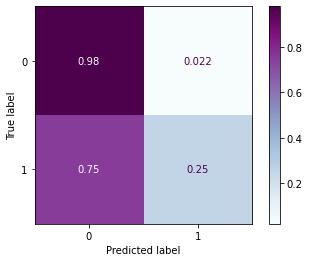

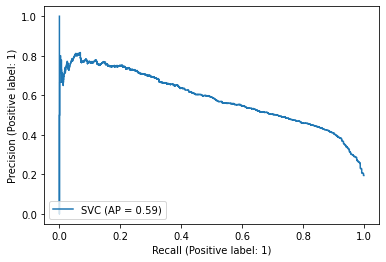

In [172]:
svm_matrix, svm_prCurve = printRocAucCurve(svm_model, X_test, y_test, svm_model.decision_function(X_test), "SVM Regression")

In [174]:
crossval_svm_model = SVC()
crossValidation(crossval_svm_model, 10, ['accuracy', 'precision', 'recall', 'f1'], X_train, y_train)

test_accuracy      0.840248
train_accuracy     0.840461
test_precision     0.755581
train_precision    0.757839
test_recall        0.247219
train_recall       0.247259
test_f1            0.372146
train_f1           0.372760
dtype: float64

In [175]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [176]:
svm_model = SVC(class_weight="balanced")


param_grid = {"C":[0.5,1],
             "gamma":["scale","auto", 0.1,0.3],
             "kernel":["rbf", "linear"]}

cv = StratifiedKFold(n_splits = 5) # for unbalanced data

svm_grid_model = GridSearchCV(svm_model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall_macro",   
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # fit the model

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [177]:
print('Best Params:', svm_grid_model.best_params_)
print('Best Recall Score(test):', svm_grid_model.best_score_)
print('Best Score Index:', svm_grid_model.best_index_)

Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Recall Score(test): 0.8042833809480131
Best Score Index: 10


In [178]:
pd.DataFrame(svm_grid_model.cv_results_).loc[svm_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.804283
mean_train_score    0.830555
Name: 10, dtype: object

In [179]:
y_pred=svm_grid_model.predict(X_test)
decision_fonc = svm_grid_model.decision_function(X_test)

svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)

In [180]:
evaluation(svm_grid_model, X_train, y_train, X_test, y_test, 'Grid SVM model')

-----------------------Evaluation Starts------------------
Evaluation For Grid SVM model Test
[[3358 1094]
 [ 153  879]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      4452
           1       0.45      0.85      0.59      1032

    accuracy                           0.77      5484
   macro avg       0.70      0.80      0.71      5484
weighted avg       0.86      0.77      0.79      5484

--------------------------------------------------------------------------------------------
Evaluation For Grid SVM model Train
[[13472  4255]
 [  422  3785]]
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     17727
           1       0.47      0.90      0.62      4207

    accuracy                           0.79     21934
   macro avg       0.72      0.83      0.74     21934
weighted avg       0.87      0.79      0.81     21934

-----------------------Evaluation Ends------------------


SVM ROC-AUC Score: 0.8755230207484486
--------------------------------------------------


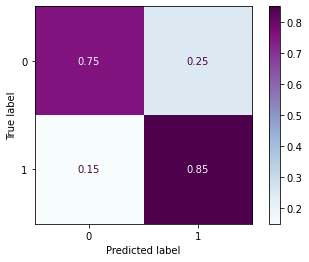

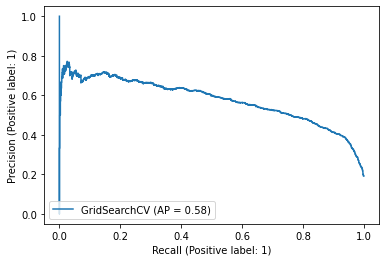

In [181]:
svm_grid_matrix, svm_grid_prCurve = printRocAucCurve(svm_grid_model, X_test, y_test, decision_fonc, "GridCV SVM Regression")

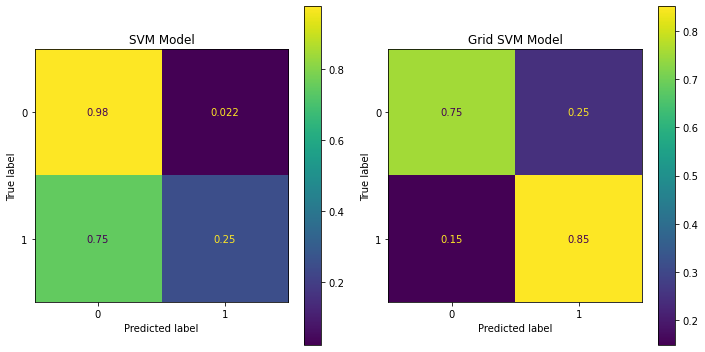

In [182]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

svm_matrix.plot(ax=ax[0])
ax[0].set_title("SVM Model")
svm_grid_matrix.plot(ax=ax[1])
ax[1].set_title("Grid SVM Model")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Grid SVM Model(PR)')

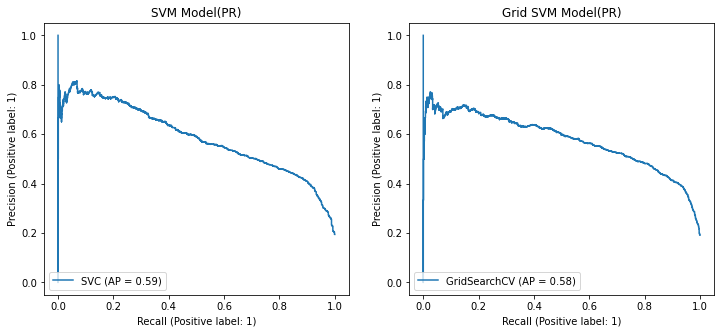

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

svm_prCurve.plot(ax=ax[0])
ax[0].set_title("SVM Model(PR)")
svm_grid_prCurve.plot(ax=ax[1])
ax[1].set_title("Grid SVM Model(PR)")